# (B) Bound case

In [3]:
# This cell runs the file "Orbital_functions.ipynb" such that the functions in that file can be utillized here
%run ./Orbital_functions.ipynb

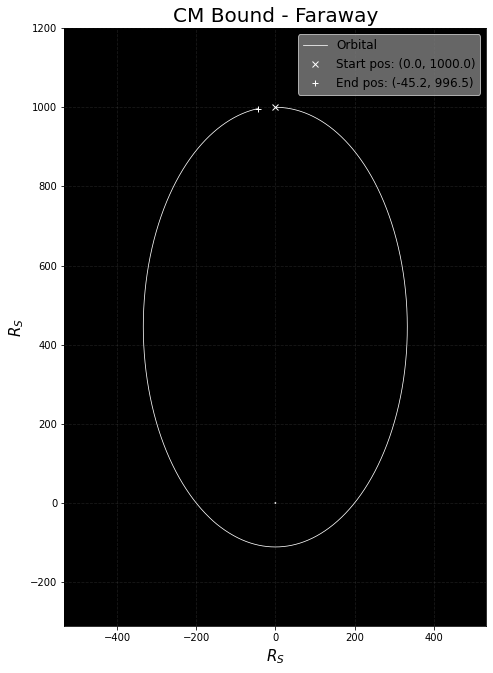

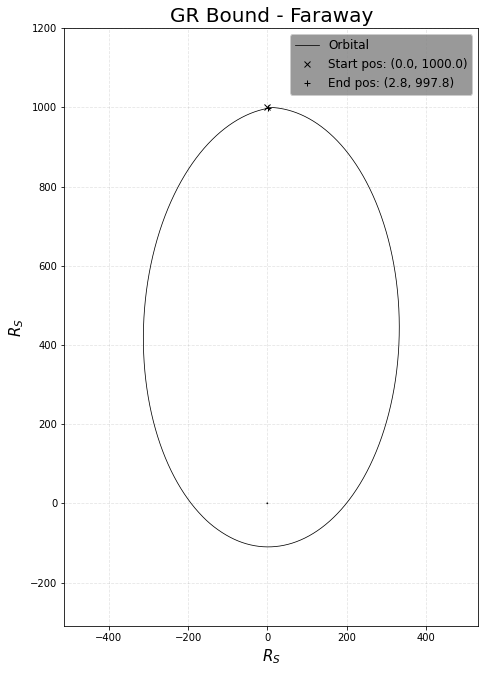

In [5]:

# # CM Bound orbital, close starting pos
# s2 = [0,10,0.2,0]
# pos2 = orbitals(s2, GR = False,Tmax = 2000)[1]
# orbPlot2 = orbPlotter(pos2,'CM Bound - Close')

# CM Bound orbital, faraway starting pos
s1 = [0,1000,0.01,0]
pos1 = orbitals(s1, GR = False,Tmax = 112000)[1]
orbPlot1 = orbPlotter(pos1,'CM Bound - Faraway', save = True)

# # GR bound orbital, close starting pos
# s2 = [0,10,0.2,0]
# pos2 = orbitals(s2, GR = True,Tmax = 2000)[1]
# orbPlot2 = orbPlotter(pos2,'GR Bound - Close', GR = True)

# # GR bound orbital, faraway starting pos
# s2 = [0,1000,0.01,0]
# pos2 = orbitals(s2, GR = True, Tmax = 2027500)[1]
# orbPlot2 = orbPlotter(pos2,'GR Bound - Faraway', GR = True)
# # prettyOrbPlot2 = prettyOrbPlotter(pos2,'GR Bound - Faraway (pretty)', GR = True)

# GR bound orbital, faraway starting pos, one round
s2 = [0,1000,0.01,0]
pos2 = orbitals(s2, GR = True, Tmax = 112000)[1]
orbPlot2 = orbPlotter(pos2,'GR Bound - Faraway', GR = True, save = True)
# prettyOrbPlot2 = prettyOrbPlotter(pos2,'GR Bound - Faraway (pretty)', GR = True)

## Checking whether GR reduces to CM
We check by checking whether the parameters of the ellipse of the first round trip in the GR case mathces the ellipse of the CM case.

It should be said that throughout this we assume some things in this:
1. The motion of the first round trip is an ellipse in both cases.
2. That the line going thorugh the points $(x_1, max(y))$ and $(x_2, min(y))$ is perfectly horizontal (that is $x_1 = x_2$).
3. That the line going thorugh the points $(max(x), y_1)$ and $(min(x), y_2)$ is perfectly vertical (that is $y_1 = y_2$).

We check the semi-major and -minor axis $a$ and $b$ by finding the distances between the points mentioned above

$$a = || (x_1, \max(y)) - (x_2, \min(y)) ||,$$

and similarly for the semi-minor axis $b$

$$b = || (\max(x), y_1) - (\min(x), y_2) ||.$$

In [10]:
# CM Bound orbital, faraway starting pos
s1 = [0,1000,0.01,0]
pos1 = orbitals(s1, GR = False,Tmax = 112000)[1]
orbPlot1 = orbPlotter(pos1,'CM Bound - Faraway', show = False)

# GR bound orbital, faraway starting pos, one round
s2 = [0,1000,0.01,0]
pos2 = orbitals(s2, GR = True, Tmax = 112000)[1]
orbPlot2 = orbPlotter(pos2,'GR Bound - Faraway', GR = True, show = False)

a_CM = np.abs(max(pos1[0]) - min(pos1[0]))
b_CM = np.abs(max(pos1[1]) - min(pos1[1]))

a_GR = np.abs(max(pos2[0]) - min(pos2[0]))
b_GR = np.abs(max(pos2[1]) - min(pos2[1]))

δa = np.abs(a_CM - a_GR)
δb = np.abs(b_CM - b_GR)

a_CM, b_CM, a_GR, b_GR

print(f'δa = {δa}, δb = {δb}')

δa = 20.87040274630192, δb = 1.1126776322221303


## Circular bound orbit
Here's an example of a circular bound orbit

In [1]:
α = 0
β = 1000
κ = 1
ρ = sqrt(α**2 + β**2)

E = 25e-5

P = findPinf(E, α, β, κ)

tmax = 1000000

s = [α, β, P, 0]
pos = orbitals(s, GR = False, Tmax = tmax, resolution = round(tmax), RS = 1, d=3)[1]
orbPlot = orbPlotter(pos,f'CM - Circular Bound Orbit', show = True, GR = False)

s = [α, β, P, 0]
pos = orbitals(s, GR = True, Tmax = tmax, resolution = round(tmax), RS = 1, d=3)[1]
orbPlot = orbPlotter(pos,f'GR - Circular Bound Orbit', show = True, GR = True)

print(f'E = {E}, ρ = {ρ}, P = {P:.5f}')

NameError: name 'sqrt' is not defined

# (C) Scattering case

In [12]:
# s3 = [0,10,0.2,-0.25]
# pos3 = orbitals(s3, GR = False)[1]
# orbPlot3 = orbPlotter(pos3,'CM Scattering - Scattering orbital')

# s3 = [0,10,0.2,-0.25]
# pos3 = orbitals(s3, GR = True)[1]
# orbPlot3 = orbPlotter(pos3,'GR Scattering - Scattering orbital', GR = True)

## Checking the scattering angle
To find the scattering angle analytically in our variables we do the following:

(5.14 from analmech book)

$$\bar \gamma = G(m + M) \approx M = \tfrac{1}{2} R_S$$

$$\cot {\tfrac{1}{2} \theta} = \frac{v_\infty^2 b}{\bar \gamma}$$
$$\longrightarrow \qquad \theta = 2 \, \mathrm{arctan\,} \left[\frac{\bar \gamma}{v_\infty^2 b}\right] \qquad \text{in our variables} \qquad \theta = 2 \, \mathrm{arctan\,} \left[\frac{1}{2 P_\infty^2 \beta}\right].$$

Now, to find the scattering angle from our numerical solution, we take the end position and scoot it over by $\beta$ to have it relative to the origin. Then we extract the end positions and use basic trigonometry to calculate the scattering angle.

Right underneath here we check the difference of the analytical and numerical scattering angle for a range of different energies between 0 and 1.

In [13]:
# Defining parameters
α = -1000
β = 10
κ = 1
ρ = sqrt(α**2 + β**2)

θ_as = []
θ_cs = []
δs = []

for E in linspace(0.01,1,10):
    # Finding momentum from energy
    P = findPinf(E, α, β, κ)

    # Calculating orbitals
    s = [α,β,P,0]
    tmax = 10000
    pos = orbitals(s, GR = False, Tmax = tmax)[1]
    orbPlot = orbPlotter(pos,f'CM Scattering - E = {E:.2f}', show = False)
    

    #Extracting end position and translating with β
    end_pos = [pos[0][-1], pos[1][-1] - β]

    # Calculating θ analytically
    θ_anal = 2*np.arctan(1/(2*P**2*β))
    θ_anal = np.abs(θ_anal)
    θ_as.append(θ_anal)

    # Calculating θ from numerical solution
    θ_code = np.arctan(end_pos[1]/end_pos[0])
    θ_code = np.abs(θ_code)
    θ_cs.append(θ_code)

    # Calculating difference between numerical and analytical methods
    δ = θ_code - θ_anal
    δs.append(δ)

δs


[-1.6042931632247948,
 0.00031204974326909385,
 4.250164319929972e-05,
 -0.00014719668153939658,
 -0.00021721007077533938,
 4.012718223414535e-05,
 -2.1929574747364677e-06,
 -7.870744115956452e-06,
 3.702252242995113e-05,
 3.460308407254864e-05]

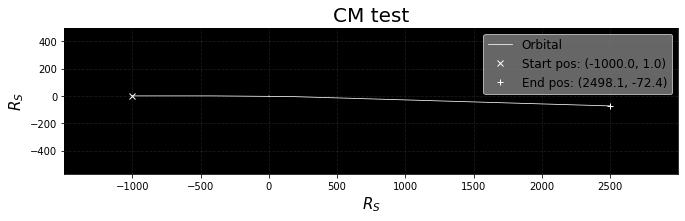

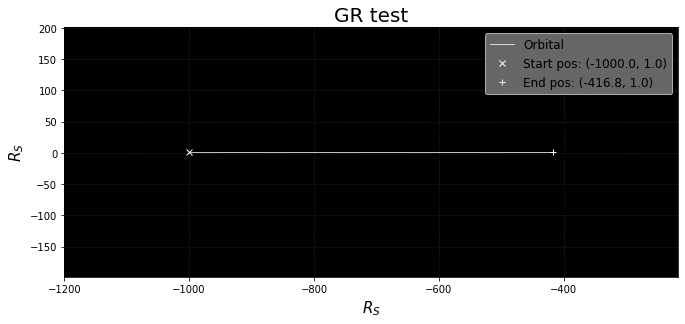

In [14]:
α = -1000
β = 1
κ = 1

ρ = sqrt(α**2 + β**2)


E = 17
P = findPinf(E, α, β, κ)

tmax = 1000000

s = [α, β, P, 0]
pos = orbitals(s, GR = False, Tmax = tmax, resolution = round(0.01*tmax), RS = 1, d=3)[1]
orbPlot = orbPlotter(pos,f'CM test')
# prettyOrbPlot = prettyOrbPlotter(pos,'CM test')
pos = orbitals(s, GR = True, Tmax = tmax, resolution = round(0.01*tmax), RS = 1, d=3)[1]
orbPlot = orbPlotter(pos,f'GR test')
# prettyOrbPlot = prettyOrbPlotter(pos,'GR test')

In [15]:
# α = -1000
# β = 1000
# κ = 1

# ρ = sqrt(α**2 + β**2)

# E = -κ/ρ


# for i in range(0,10):
#     E = E+i/40000
#     print(f'E_{i} = {E}')
#     P = findPinf(E, α, β, κ)

#     tmax = 1000000

#     s = [α, β, P, 0]
#     pos = orbitals(s, GR = False, Tmax = tmax, resolution = round(0.01*tmax), RS = 1, d=3)[1]
#     orbPlot = orbPlotter(pos,f'test_{i}')
#     # prettyOrbPlot = prettyOrbPlotter(pos,'test')